<a href="https://colab.research.google.com/github/barauna-lo/Neurocomputing/blob/main/Project_04_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png align=”middle”>](https://www.gov.br/inpe/pt-br)

[<center><img src="https://github.com/barauna-lo/Deep-Learning/blob/main/LogoCAP.png?raw=true" width = 450 align="middle"></center>](http://www.inpe.br/posgraduacao/cap/)


# Project 04 - Convolutional Neural Networks (CNN)

* [Luan Orion Baraúna](https://www.linkedin.com/in/luan-orion-barauna/)


## PROJETO 4 – Redes Neurais Convolucionais

Implementar uma rede CNN
– Usar MNIST, MNIST-Fashion, ou CIFAR-10 (ou outro dataset)

• Avaliar diferentes topologias (>5 topologias) e parâmetros

• Calcular a matriz de confusão para os dois melhores modelos

• Avaliar a diferença entre os modelos (top-2)

• Treinar uma rede MLP (já implementada no trabalho anterior) e
comparar com a rede CNN gerada: acurácia e número de
parâmetros

#Project Report

## Introduction 


Convolutional neural networks is a machine learning technique inspired by the experiment in cats and later in dogs on the way of capturing information by the visual cortex from which it can be concluded that many neurons in the visual cortex have a small local receptive . In this way, a reaction occurs in which the visual stimuli are located in a limited region of the visual field. A posteriori it was observed that some neurons have the ability to recognize patterns of only straight lines and/or specific shapes.

It was on this understanding that convolutional neural networks were architected. A convolutional layer is a region from which neurons will be linked to a region of pixels to which a set of filters is added. Filters are responsible for “learning” patterns in the image set so that, if in a certain region, that pattern appears again in an image, it can then be recognized by the neuron that learned it.

The calcularion of a output from an single neuron in a convolutional layer is

$$
z_{i,j,k}=b_k + \sum^{f_h-1}_u \sum^{f_w-1}_v \sum^{f_{n'}-1}_k x_{i',j',k'} \cdot w_{u,v,k',k} 
$$
$$
\text{with }\left\{\begin{array}{r}
i'= i\times s_h + u \\
j'= j\times s_w + v 
\end{array}\right.
$$

Where $z_{i,j,k}$ is the neuron output in row $i$ and column $j$ in feature map $k$ in layer $l$, $s_h$ and $s_w$ are the vertical steps and horizontally, $f_h$ and $f_w$ are the dimensions of the receptive field. $x_{i',j',k'}$ is the output of a neuron in the previous layer $(l-1)$, row $i'$, column $j'$ in map $k'$, $b_k $ is the bies in the map $k$ layer $l$ and $w_{u,v,k',k}$ is the weight of any neuron in a map $k$ in a layer $l$ located in lin $u $, column $v$ for map $k'$.

In this way, neural network architectures are designed from a set of hypertangles that vary from the number of filters, to the size of the exploration region of the network in the image, padding responsible for maintaining the dimensionality after passing the filter in that particular image, stride, by how many pixels will we skip to the next analysis among others.

http://alexlenail.me/NN-SVG/LeNet.html


<img src="https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif" width = 300>

font ="https://medium.com/analytics-vidhya/multi-layer-perceptron-using-keras-on-mnist-dataset-for-digit-classification-problem-relu-a276cbf05e97"

## Metodology 


In this work, we explore the performance of 2D convolutional neural network topologies using Keras as a backend. In it, we will analyze the scoring metric to classify Mnist handwritten data.

The Keras API allows in each layer a set of several hypermeters which allows for designing several sets of hyperparameters illustrated in the code below.


```
tf.keras.layers.Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding="valid",
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)
```
font https://keras.io/api/layers/convolution_layers/convolution2d/

In these experiments, we limited ourselves to testing the impact of multiple layers with an increment of twice the number of filters for each layer and observing the impact of this hypermeter on the network score using as model an exemple provid by Keras web site.


## Datasets

We use the MNist a Keras native datasets. The Mnist are a grayscale images labeled 0, 9 imagens. Mniste is a classic set used for image classification composed of images of handwritten numbers.

<img src="https://thumbs.gfycat.com/SmoggyLittleFlickertailsquirrel-max-1mb.gif" width =800>

https://gfycat.com/smoggylittleflickertailsquirrel



## Plots and Results



## Extras



# Project Code

The section bellow discribe the experimental code

## Librarys

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#For MLP Analyse

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, callbacks

In [18]:
#Setting Random seeds🌱
from numpy.random import seed
seed(42)
import tensorflow
tensorflow.random.set_seed(42)

## Functions 

In [62]:
#Set Seaborn sytle
sns.set_style('darkgrid')

def plot_confusion_matrix(model,x_test,_y_test,title="Confusion Matrix"):
  y_pred = model.predict(x_test) # Predict class probabilities as 2 => [0.1, 0, 0.9, 0, 0, 0, 0, 0, 0, 0]
  Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
  _y_test = np.argmax(y_test, 1) # Decode labels
  mat = confusion_matrix(_y_test, Y_pred) # Confusion matrix
  sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
  plt.xlabel('Predicted Values')
  plt.ylabel('True Values')
  plt.title(title)

## Data Set

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


11501568/11490434 [==============================] - 0s 0us/step


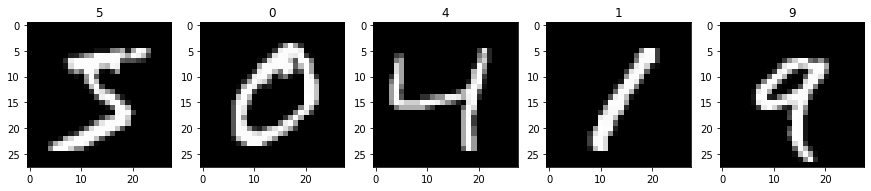

In [ ]:
plt.figure(figsize=(15,5))
for i in range(0,5):
  plt.subplot(1,5,i+1)
  plt.imshow(x_train[i] ,cmap ='gray')
  plt.title(str(np.argmax(y_train[i], 0)))

In [4]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## CNN Models

In [28]:
model1 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model3 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model4 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=256, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model5 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="valid"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="valid"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=256, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model6 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="valid"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=256, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [ ]:
# models = [model1,model2,model3,model4,model5,model6]
# historys = [] 

# batch_size = 128
# epochs = 20
# for i in range(len(models)):
#   models[i].compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#   historys.append(models[i].fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1))



### Score

In [31]:
score = []
for i in range(len(models)): 
  score.append(models[i].evaluate(x_test, y_test, verbose=0))


In [32]:
model_name = ['model 1','model 2','model 3','model 4','model 5','model 6']
for i in range(len(models)):
  print(model_name[i])
  print("Test loss:", score[i][0])
  print("Test accuracy:", score[i][1])


model 1
Test loss: 0.05025001987814903
Test accuracy: 0.9836999773979187
model 2
Test loss: 0.024924447759985924
Test accuracy: 0.9922999739646912
model 3
Test loss: 0.02081046998500824
Test accuracy: 0.9937000274658203
model 4
Test loss: 0.028831005096435547
Test accuracy: 0.9929999709129333
model 5
Test loss: 0.04015234857797623
Test accuracy: 0.9915000200271606
model 6
Test loss: 0.035570044070482254
Test accuracy: 0.9923999905586243


### Results

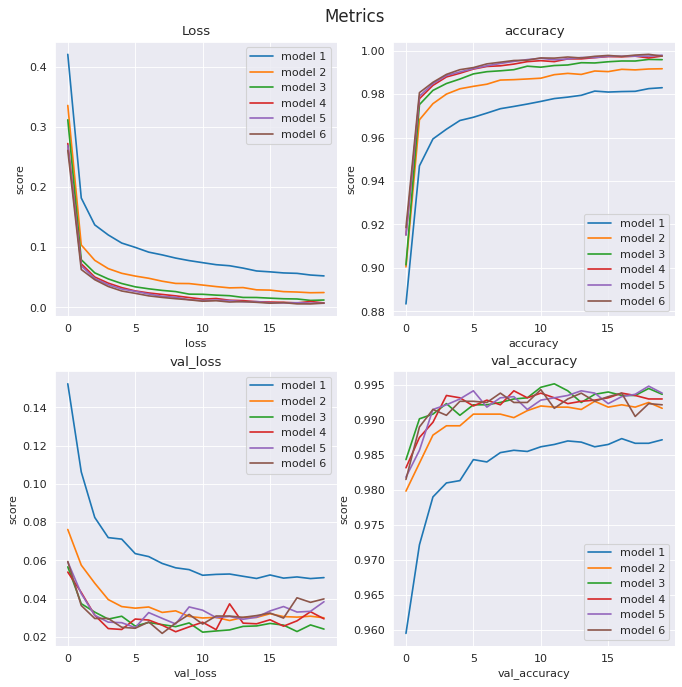

In [63]:
model_name = ['model 1','model 2','model 3','model 4','model 5','model 6']

fig = plt.figure(figsize=(10, 10),dpi=80) # Set Figure
plt.suptitle('Metrics',  y=0.90, horizontalalignment='center', verticalalignment='bottom', fontsize = 15)
plt.subplot(2,2,1)
for i in range(len(models)): plt.plot(historys[i].history['loss'],label=model_name[i])
plt.xlabel('loss')
plt.ylabel('score')
plt.title('Loss')
plt.legend()

plt.subplot(2,2,2)
for i in range(len(models)): plt.plot(historys[i].history['accuracy'],label=model_name[i])
plt.xlabel('accuracy')
plt.ylabel('score')
plt.title('accuracy')
plt.legend()

plt.subplot(2,2,3)
for i in range(len(models)): plt.plot(historys[i].history['val_loss'],label=model_name[i])
plt.xlabel('val_loss')
plt.ylabel('score')
plt.title('val_loss')
plt.legend()

plt.subplot(2,2,4)
for i in range(len(models)): plt.plot(historys[i].history['val_accuracy'],label=model_name[i])
plt.xlabel('val_accuracy')
plt.ylabel('score')
plt.title('val_accuracy')
plt.legend()

plt.show()

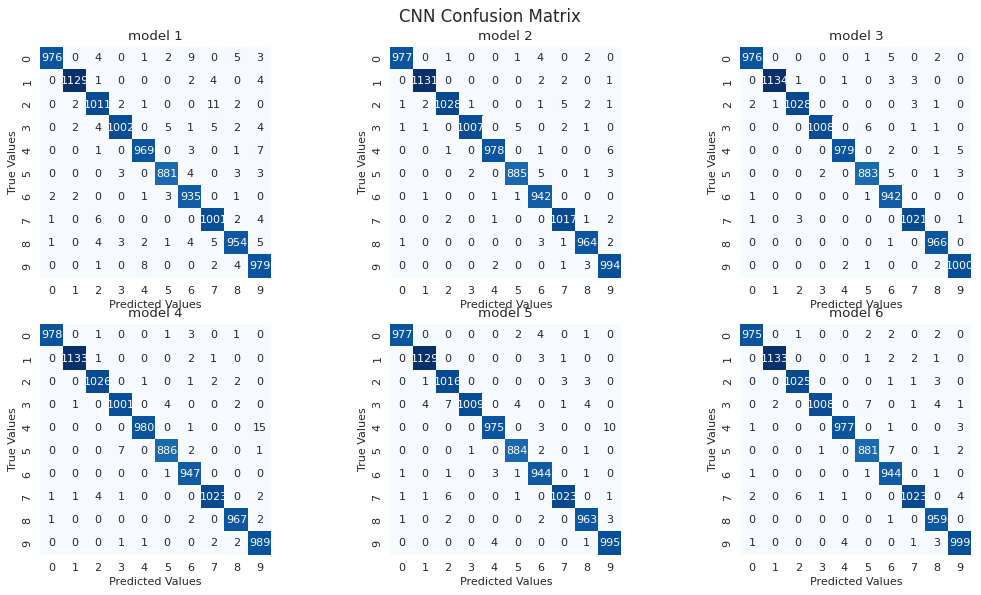

In [153]:
#y_test = np.argmax(y_test, 1) # Decode labels
fig = plt.figure(figsize=(16, 13),dpi=80) # Set Figure
plt.suptitle('CNN Confusion Matrix',  y=0.90, horizontalalignment='center', verticalalignment='bottom', fontsize = 15)
# Plot Confusion matrix
for i in range(len(models)):
  plt.subplot(3,3,i+1)
  plot_confusion_matrix(models[i],x_test,y_test,model_name[i])
plt.show()
#https://www.kaggle.com/code/elcaiseri/mnist-simple-cnn-keras-accuracy-0-99-top-1

## MLP Models

https://www.kaggle.com/code/athews/mnist-tf-mlp-vs-cnn-vs-transfer-learning

In [59]:
import tensorflow as tf

In [ ]:
#reshapinh data for the MLP models
X_train = x_train.reshape(x_train.shape[0], 28, 28)
Y_train = np.argmax(y_train, 1) # Decode labels

learning_rate = 0.001
epochs = 20
batch_size = 4000
validation_split = 0.2

#Model Parametes
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

early_stopping = callbacks.EarlyStopping(
        min_delta=0.001, # minimium amount of change to count as an improvement
        patience=20,     # how many epochs to wait before stopping
        restore_best_weights=True,
    )

In [154]:
28*28

784

In [155]:
# model_mlp_1 = tf.keras.models.Sequential()
# model_mlp_1.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  
# model_mlp_1.add(tf.keras.layers.Dense(units=256, activation='relu'))
# model_mlp_1.add(tf.keras.layers.Dropout(rate=0.2))
# model_mlp_1.add(layers.BatchNormalization())
# model_mlp_1.add(tf.keras.layers.Dense(units=128, activation='relu'))
# model_mlp_1.add(tf.keras.layers.Dropout(rate=0.2))
# model_mlp_1.add(layers.BatchNormalization())
# model_mlp_1.add(tf.keras.layers.Dense(units=10, activation='softmax'))                          

model_mlp_1 = tf.keras.models.Sequential()
model_mlp_1.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  
model_mlp_1.add(tf.keras.layers.Dense(units=784, activation='relu'))
model_mlp_1.add(tf.keras.layers.Dropout(rate=0.2))
model_mlp_1.add(layers.BatchNormalization())
model_mlp_1.add(tf.keras.layers.Dense(units=10, activation='softmax'))                          

model_mlp_2 = tf.keras.models.Sequential()
model_mlp_2.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  
model_mlp_2.add(tf.keras.layers.Dense(units=256, activation='relu'))
model_mlp_2.add(tf.keras.layers.Dropout(rate=0.2))
model_mlp_2.add(layers.BatchNormalization())
model_mlp_2.add(tf.keras.layers.Dense(units=128, activation='relu'))
model_mlp_2.add(tf.keras.layers.Dropout(rate=0.2))
model_mlp_2.add(layers.BatchNormalization())
model_mlp_2.add(tf.keras.layers.Dense(units=10, activation='softmax'))                          



In [156]:
model_mlp_1.summary()

Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_67 (Flatten)        (None, 784)               0         
                                                                 
 dense_97 (Dense)            (None, 784)               615440    
                                                                 
 dropout_74 (Dropout)        (None, 784)               0         
                                                                 
 batch_normalization_16 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_98 (Dense)            (None, 10)                7850      
                                                                 
Total params: 626,426
Trainable params: 624,858
Non-trainable params: 1,568
___________________________________________

In [157]:
model_mlp_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss="sparse_categorical_crossentropy",
            metrics=['accuracy'])

history_mlp_1 = model_mlp_1.fit(x=X_train, y=Y_train, batch_size=batch_size,
                      epochs=epochs, 
                      shuffle=True, 
                      callbacks=[early_stopping],
                      validation_split=validation_split)
#epochs = history.epoch
#hist = pd.DataFrame(history.history)

Epoch 1/20
12/12 [==============================] - 4s 304ms/step - loss: 0.7807 - accuracy: 0.7573 - val_loss: 0.9610 - val_accuracy: 0.7302
Epoch 2/20
12/12 [==============================] - 3s 293ms/step - loss: 0.2638 - accuracy: 0.9218 - val_loss: 0.7923 - val_accuracy: 0.8303
Epoch 3/20
12/12 [==============================] - 4s 350ms/step - loss: 0.1887 - accuracy: 0.9440 - val_loss: 0.7378 - val_accuracy: 0.8813
Epoch 4/20
12/12 [==============================] - 3s 288ms/step - loss: 0.1490 - accuracy: 0.9568 - val_loss: 0.7028 - val_accuracy: 0.9174
Epoch 5/20
12/12 [==============================] - 3s 291ms/step - loss: 0.1222 - accuracy: 0.9652 - val_loss: 0.6692 - val_accuracy: 0.9336
Epoch 6/20
12/12 [==============================] - 3s 288ms/step - loss: 0.1037 - accuracy: 0.9709 - val_loss: 0.6280 - val_accuracy: 0.9423
Epoch 7/20
12/12 [==============================] - 3s 290ms/step - loss: 0.0888 - accuracy: 0.9747 - val_loss: 0.5929 - val_accuracy: 0.9510
Epoch 

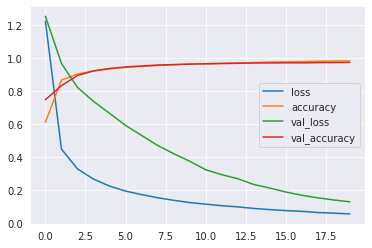

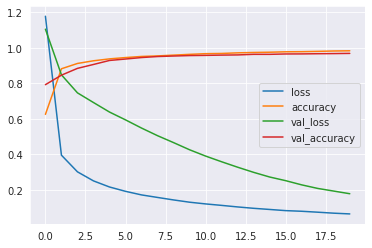

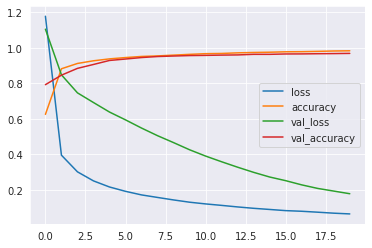

In [158]:
hist2 = pd.DataFrame(history_mpl_1.history)
hist.plot()
hist1.plot()
hist2.plot()

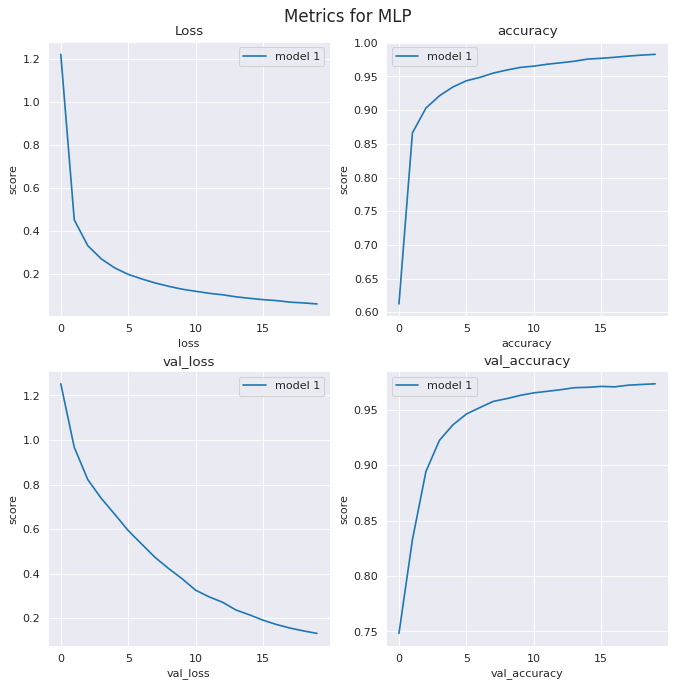

In [148]:
models_mlp = [model_mlp_1]
history_mll = [history_mpl_1]

#history_mpl[0].history

model_name = ['model 1','model 2','model 3','model 4','model 5','model 6']

fig = plt.figure(figsize=(10, 10),dpi=80) # Set Figure
plt.suptitle('Metrics for MLP',  y=0.90, horizontalalignment='center', verticalalignment='bottom', fontsize = 15)
plt.subplot(2,2,1)
for i in range(len(models_mlp)): plt.plot(history_mpl[i].history['loss'],label=model_name[i])
plt.xlabel('loss')
plt.ylabel('score')
plt.title('Loss')
plt.legend()

plt.subplot(2,2,2)
for i in range(len(models_mlp)): plt.plot(history_mpl[i].history['accuracy'],label=model_name[i])
plt.xlabel('accuracy')
plt.ylabel('score')
plt.title('accuracy')
plt.legend()

plt.subplot(2,2,3)
for i in range(len(models_mlp)): plt.plot(history_mpl[i].history['val_loss'],label=model_name[i])
plt.xlabel('val_loss')
plt.ylabel('score')
plt.title('val_loss')
plt.legend()

plt.subplot(2,2,4)
for i in range(len(models_mlp)): plt.plot(history_mpl[i].history['val_accuracy'],label=model_name[i])
plt.xlabel('val_accuracy')
plt.ylabel('score')
plt.title('val_accuracy')
plt.legend()

plt.show()

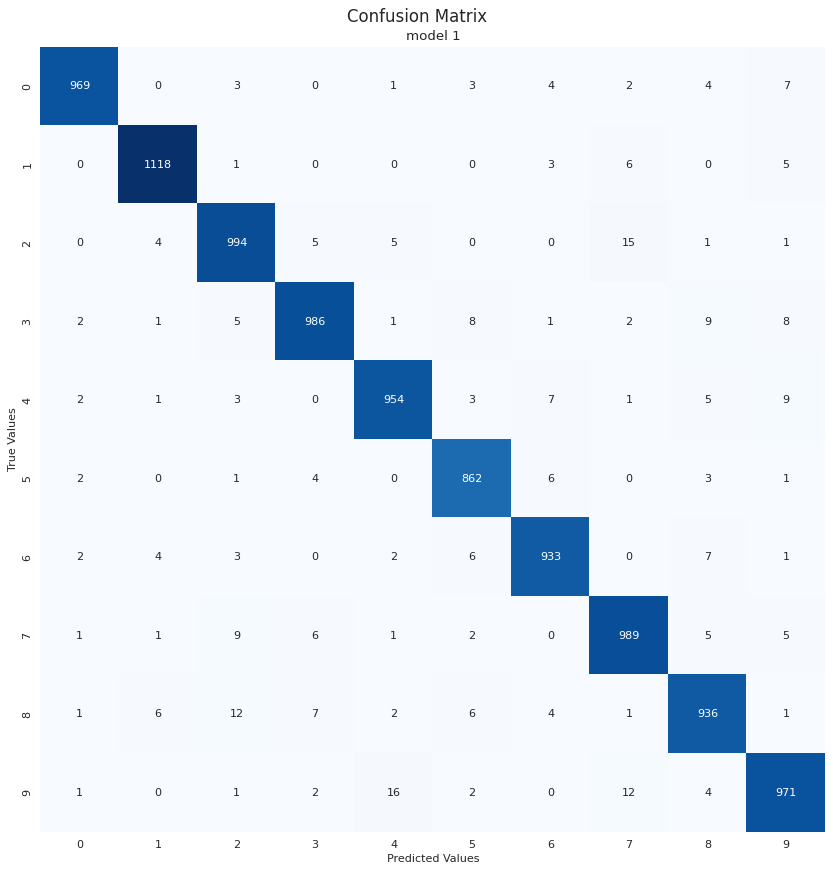

In [152]:
#y_test = np.argmax(y_test, 1) # Decode labels
fig = plt.figure(figsize=(16, 13),dpi=80) # Set Figure
plt.suptitle('Confusion Matrix',  y=0.90, horizontalalignment='center', verticalalignment='bottom', fontsize = 15)
# Plot Confusion matrix
for i in range(len(models_mlp)):
  plt.subplot(1,1,i+1)
  plot_confusion_matrix(models_mlp[i],x_test,y_test,model_name[i])
plt.show()
#https://www.kaggle.com/code/elcaiseri/mnist-simple-cnn-keras-accuracy-0-99-top-1

# References

[HAYKIN, Simon. Redes Neurais: Princípios e prática. Porto Alegre
RS:Bookman, 2001.](https://www.amazon.com.br/Redes-Neurais-Princ%C3%ADpios-Simon-Haykin-ebook/dp/B073QSG69Y)

https://www.w3schools.com/python/python_classes.asp

https://towardsdatascience.com/understanding-variational-autoencoders-vaes-f70510919f73?gi=21e42fd28916

https://www.kaggle.com/code/phelpsmemo/cap-351-neurocomputacao-projeto4-autoencoder

https://www.kaggle.com/code/rvislaywade/visualizing-mnist-using-a-variational-autoencoder

https://youtu.be/Ey8IZQl_lKs


